In [0]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.layers import Embedding, Flatten, Dense
from sklearn import preprocessing
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv('imdb_master.csv',encoding='latin-1')

df.head()


,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [0]:
# max_review_len

In [25]:
df.label.value_counts()


unsup    50000
pos      25000
neg      25000
Name: label, dtype: int64

tokenizing data

In [0]:

df = df.drop(df[df.label == 'unsup'].index)

In [0]:
sentences = df['review'].values
y = df['label'].values
max_review_len = max([len(s.split()) for s in sentences])


In [28]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

vocab_size = len(tokenizer.word_index)+1
vocab_size

123682

getting the vocabulary of data


In [0]:
sentences = tokenizer.texts_to_matrix(sentences)
padded_docs = pad_sequences(sentences,maxlen=max_review_len)


In [0]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)


In [32]:
model = Sequential()
model.add(layers.Dense(300,input_dim=2000, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {:0.3f}, accuracy = {:0.3f}".format(test_loss, test_acc))


Train on 37500 samples, validate on 12500 samples
Epoch 1/5
37500/37500 [==============================] - 4s 102us/step - loss: 0.3494 - acc: 0.8515 - val_loss: 0.3126 - val_acc: 0.8715
Epoch 2/5
37500/37500 [==============================] - 4s 98us/step - loss: 0.2656 - acc: 0.8927 - val_loss: 0.3022 - val_acc: 0.8754
Epoch 3/5
37500/37500 [==============================] - 4s 98us/step - loss: 0.2252 - acc: 0.9095 - val_loss: 0.2944 - val_acc: 0.8776
Epoch 4/5
37500/37500 [==============================] - 4s 99us/step - loss: 0.1630 - acc: 0.9416 - val_loss: 0.3027 - val_acc: 0.8774
Epoch 5/5
12500/12500 [==============================] - 1s 48us/step
Evaluation result on Test Data : Loss = 0.314, accuracy = 0.877


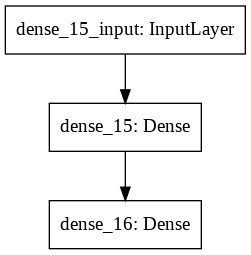

In [33]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

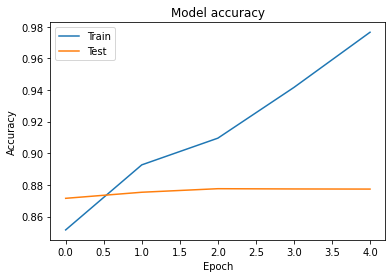

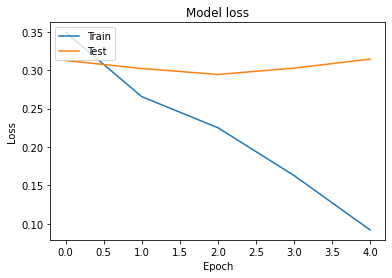

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 300)               600300    
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 903       
Total params: 601,203
Trainable params: 601,203
Non-trainable params: 0
_________________________________________________________________
12500/12500 [==============================] - 1s 47us/step
Pre-training accuracy: 87.7360%


In [34]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

model.summary()

score = model.evaluate(X_test,y_test,verbose=1)
accuracy = 100 * score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

In [35]:
model2 = Sequential()


model2.add(Embedding(input_dim = 2000, output_dim = 50, input_length=2000))
model2.add(Flatten())
model2.add(layers.Dense(300,input_dim=50, activation='relu'))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model2.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2000, 50)          100000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 100000)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 300)               30000300  
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 903       
Total params: 30,101,203
Trainable params: 30,101,203
Non-trainable params: 0
_________________________________________________________________


In [36]:
history2=model2.fit(X_train,y_train, epochs=6, verbose=True, validation_data=(X_test,y_test), batch_size=256)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 37500 samples, validate on 12500 samples
Epoch 1/6
37500/37500 [==============================] - 97s 3ms/step - loss: 0.6716 - acc: 0.7688 - val_loss: 0.3043 - val_acc: 0.8777
Epoch 2/6
37500/37500 [==============================] - 99s 3ms/step - loss: 0.2849 - acc: 0.8817 - val_loss: 0.2887 - val_acc: 0.8789
Epoch 3/6
37500/37500 [==============================] - 97s 3ms/step - loss: 0.2645 - acc: 0.8886 - val_loss: 0.2912 - val_acc: 0.8770
Epoch 4/6
37500/37500 [==============================] - 96s 3ms/step - loss: 0.2532 - acc: 0.8951 - val_loss: 0.2903 - val_acc: 0.8800
Epoch 5/6
37500/37500 [==============================] - 96s 3ms/step - loss: 0.2371 - acc: 0.9017 - val_loss: 0.2926 - val_acc: 0.8774
Epoch 6/6
37500/37500 [==============================] - 97s 3ms/step - loss: 0.2176 - acc: 0.9100 - val_loss: 0.3002 - val_acc: 0.8752


In [37]:
[test_loss, test_acc] = model2.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {:0.3f}, accuracy = {:0.3f}".format(test_loss, test_acc))


12500/12500 [==============================] - 12s 989us/step
Evaluation result on Test Data : Loss = 0.300, accuracy = 0.875


In [0]:
#To fetch 20newsgroups training dataset
from sklearn.datasets import fetch_20newsgroups
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB


In [0]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

y = twenty_train.target
sentences = twenty_train.data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
sentences = tokenizer.texts_to_matrix(sentences)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)


In [41]:
model = Sequential()
model.add(layers.Dense(300,input_dim=2000, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=10, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 8485 samples, validate on 2829 samples
Epoch 1/10
8485/8485 [==============================] - 1s 75us/step - loss: 2.1912 - acc: 0.4778 - val_loss: 1.3408 - val_acc: 0.7405
Epoch 2/10
8485/8485 [==============================] - 1s 66us/step - loss: 0.8843 - acc: 0.8302 - val_loss: 0.8312 - val_acc: 0.8059
Epoch 3/10
8485/8485 [==============================] - 1s 66us/step - loss: 0.5179 - acc: 0.8957 - val_loss: 0.6872 - val_acc: 0.8183
Epoch 4/10
8485/8485 [==============================] - 1s 65us/step - loss: 0.3570 - acc: 0.9326 - val_loss: 0.6199 - val_acc: 0.8307
Epoch 5/10
8485/8485 [==============================] - 1s 66us/step - loss: 0.2625 - acc: 0.9572 - val_loss: 0.5852 - val_acc: 0.8370
Epoch 6/10
8485/8485 [==============================] - 1s 67us/step - loss: 0.1975 - acc: 0.9727 - val_loss: 0.5755 - val_acc: 0.8360
Epoch 7/10
8485/8485 [==============================] - 1s 67us/step - loss: 0.1531 - acc: 0.9823 - val_loss: 0.5645 - val_acc: 0.8356
Epoch 8

In [42]:
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

2829/2829 [==============================] - 0s 50us/step
Evaluation result on Test Data : Loss = 0.5727914329888164, accuracy = 0.8306822180747986


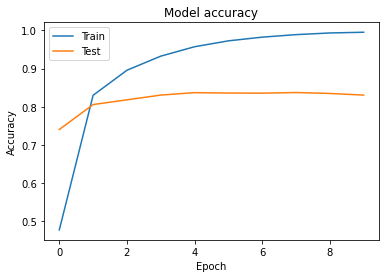

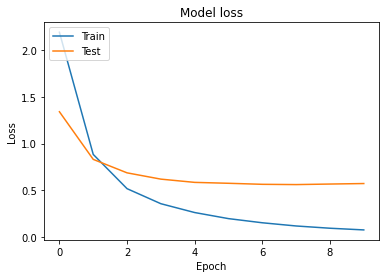

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 300)               600300    
_________________________________________________________________
dense_20 (Dense)             (None, 20)                6020      
Total params: 606,320
Trainable params: 606,320
Non-trainable params: 0
_________________________________________________________________
2829/2829 [==============================] - 0s 51us/step
Pre-training accuracy: 83.0682%


In [43]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

model.summary()

score = model.evaluate(X_test,y_test,verbose=1)
accuracy = 100 * score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 